# Quick Start Example

This notebook provides a quick example of how to load and explore the processed 13F data.

## What This Notebook Does
- Loads the processed data
- Shows basic statistics
- Creates simple visualizations
- Demonstrates key analysis patterns

Perfect for getting started quickly!


In [1]:
# Quick Start - Load and Explore 13F Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed data
print("Loading 13F data...")
holdings = pd.read_parquet('../processed_data/combined_holdings.parquet')
managers = pd.read_parquet('../processed_data/manager_summary.parquet')
securities = pd.read_parquet('../processed_data/security_summary.parquet')

print(f"✅ Data loaded successfully!")
print(f"   Holdings: {len(holdings):,} records")
print(f"   Managers: {len(managers):,} records") 
print(f"   Securities: {len(securities):,} records")


Loading 13F data...
✅ Data loaded successfully!
   Holdings: 4,488,519 records
   Managers: 10,163 records
   Securities: 214,262 records


In [2]:
# Quick Statistics
print("📊 QUICK STATISTICS")
print("=" * 40)

total_value = holdings['market_value'].sum()
print(f"Total Market Value: ${total_value/1e12:.2f} trillion")
print(f"Total Holdings: {len(holdings):,}")
print(f"Unique Managers: {holdings['manager_name'].nunique():,}")
print(f"Unique Securities: {holdings['cusip'].nunique():,}")

# Top 5 managers by market value
print(f"\n🏆 TOP 5 MANAGERS:")
top_managers = managers.nlargest(5, 'total_market_value')[['manager_name', 'total_market_value']]
for i, (_, row) in enumerate(top_managers.iterrows(), 1):
    print(f"{i}. {row['manager_name'][:50]}... - ${row['total_market_value']/1e9:.1f}B")


📊 QUICK STATISTICS
Total Market Value: $86.99 trillion
Total Holdings: 4,488,519
Unique Managers: 8,079
Unique Securities: 38,838

🏆 TOP 5 MANAGERS:
1. VANGUARD GROUP INC... - $5531.1B
2. MORGAN STANLEY... - $5497.3B
3. BlackRock, Inc.... - $4761.0B
4. STATE STREET CORP... - $2668.1B
5. STATE STREET CORP... - $2426.7B


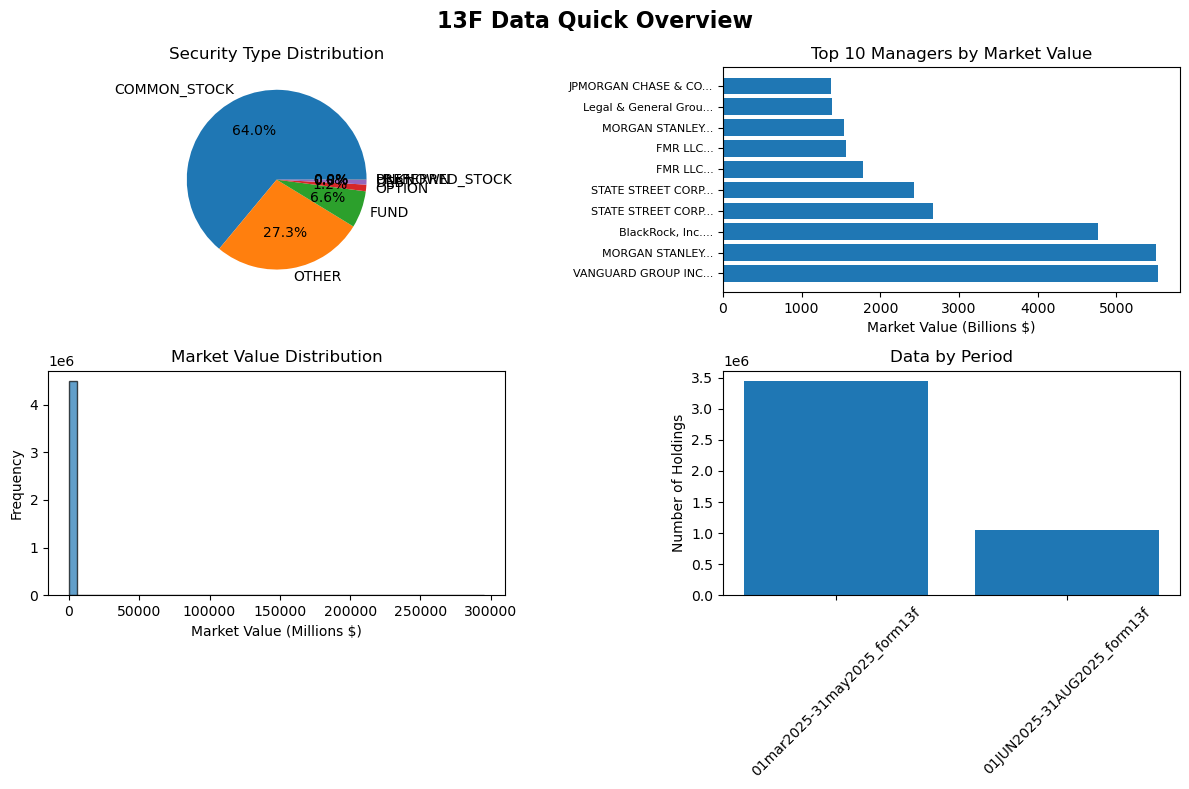

🎉 Quick analysis complete! Check out the other notebooks for deeper insights.


In [3]:
# Quick Visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('13F Data Quick Overview', fontsize=16, fontweight='bold')

# Security type distribution
security_types = holdings['security_type'].value_counts()
axes[0,0].pie(security_types.values, labels=security_types.index, autopct='%1.1f%%')
axes[0,0].set_title('Security Type Distribution')

# Top 10 managers
top_10 = managers.nlargest(10, 'total_market_value')
axes[0,1].barh(range(len(top_10)), top_10['total_market_value']/1e9)
axes[0,1].set_yticks(range(len(top_10)))
axes[0,1].set_yticklabels([name[:20] + '...' for name in top_10['manager_name']], fontsize=8)
axes[0,1].set_title('Top 10 Managers by Market Value')
axes[0,1].set_xlabel('Market Value (Billions $)')

# Market value distribution
axes[1,0].hist(holdings['market_value']/1e6, bins=50, alpha=0.7, edgecolor='black')
axes[1,0].set_title('Market Value Distribution')
axes[1,0].set_xlabel('Market Value (Millions $)')
axes[1,0].set_ylabel('Frequency')

# Data periods
period_counts = holdings['data_period'].value_counts()
axes[1,1].bar(period_counts.index, period_counts.values)
axes[1,1].set_title('Data by Period')
axes[1,1].set_ylabel('Number of Holdings')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("🎉 Quick analysis complete! Check out the other notebooks for deeper insights.")
